In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(25000,)

In [4]:
train_labels.shape

(25000,)

In [5]:
max([max(sequence) for sequence in train_data])

9999

## For kicks, here's how you can quickly decode one of these reviews back to English words:

In [0]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Preparing the Data

In [0]:
import numpy as np

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building our network

In [0]:
from keras import layers
from keras import models

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
from keras import optimizers
from keras import losses
from keras import metrics


In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

## Validating our approach

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.5087 - binary_accuracy: 0.7813 - val_loss: 0.3801 - val_binary_accuracy: 0.8688
Epoch 2/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.3008 - binary_accuracy: 0.9051 - val_loss: 0.3006 - val_binary_accuracy: 0.8901
Epoch 3/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.2181 - binary_accuracy: 0.9278 - val_loss: 0.3086 - val_binary_accuracy: 0.8719
Epoch 4/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1751 - binary_accuracy: 0.9435 - val_loss: 0.2842 - val_binary_accuracy: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1427 - binary_accuracy: 0.9541 - val_loss: 0.2847 - val_binary_accuracy: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1150 - binary_accuracy: 0.9654 - val_loss: 0.3156 - val_bi

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [0]:
import matplotlib.pyplot as plt

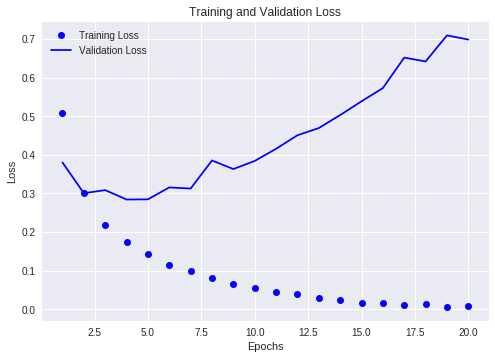

In [27]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

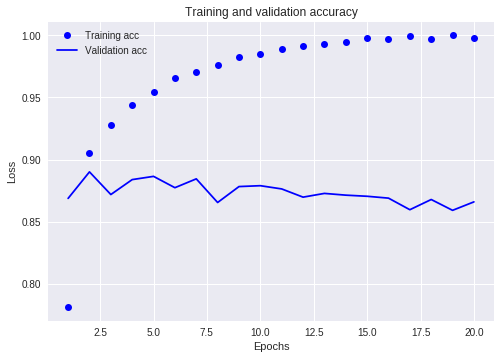

In [28]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Let's train a new network from scratch for four epochs, then evaluate it on our test data:

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.4737 - acc: 0.8220
Epoch 2/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.2674 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.2033 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 1s 55us/step


In [30]:
results

[0.31085831364631655, 0.87616]

Our fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, one should be able to get close to 95%.

## Using a trained network to generate predictions on new data

In [31]:
model.predict(x_test)

array([[0.1606919 ],
       [0.99985313],
       [0.39805213],
       ...,
       [0.08255146],
       [0.04970707],
       [0.45881623]], dtype=float32)

As you can see, the network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4).